In [16]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import joblib
import warnings
warnings.filterwarnings('ignore')

In [17]:

# Set style for visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [18]:
# Generate synthetic crop data
np.random.seed(42) 
num_samples = 2200

In [19]:
#  approximated from common datasets
features_dict = {
    'N': np.random.randint(0, 141, num_samples),
    'P': np.random.randint(5, 146, num_samples),
    'K': np.random.randint(5, 206, num_samples),
        'temperature': np.random.uniform(8, 44, num_samples).round(2),
        'ph': np.random.uniform(3.5, 9.5, num_samples).round(2),
        'rainfall': np.random.uniform(20, 300, num_samples).round(2),
    }

In [20]:
# Define possible crop types 
crop_types = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
              'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
              'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
              'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee']


In [21]:
# Assign crops randomly
features_dict['crop'] = np.random.choice(crop_types, num_samples)

In [22]:
# Create DataFrame
synthetic_data = pd.DataFrame(features_dict)


In [23]:
# Features: N, P, K, ph, rainfall, temperature
# Target: crop
column_order = ['N', 'P', 'K', 'ph', 'rainfall', 'temperature', 'crop']
synthetic_data = synthetic_data[column_order]

In [24]:
# Save to CSV
synthetic_data.to_csv('crop_data.csv', index=False)
print("Generated synthetic crop_data.csv")

Generated synthetic crop_data.csv


In [25]:
# Load and explore the dataset
data = pd.read_csv('crop_data.csv')
print(f"Dataset Shape: {data.shape}")
data.head()

Dataset Shape: (2200, 7)


,N,P,K,ph,rainfall,temperature,crop
0,102,61,191,7.33,234.17,13.00,lentil
1,92,62,120,3.80,26.20,34.90,banana
2,14,25,142,9.06,160.48,9.72,grapes
3,106,86,134,9.27,96.91,42.15,maize
4,71,73,198,4.64,201.62,33.60,watermelon


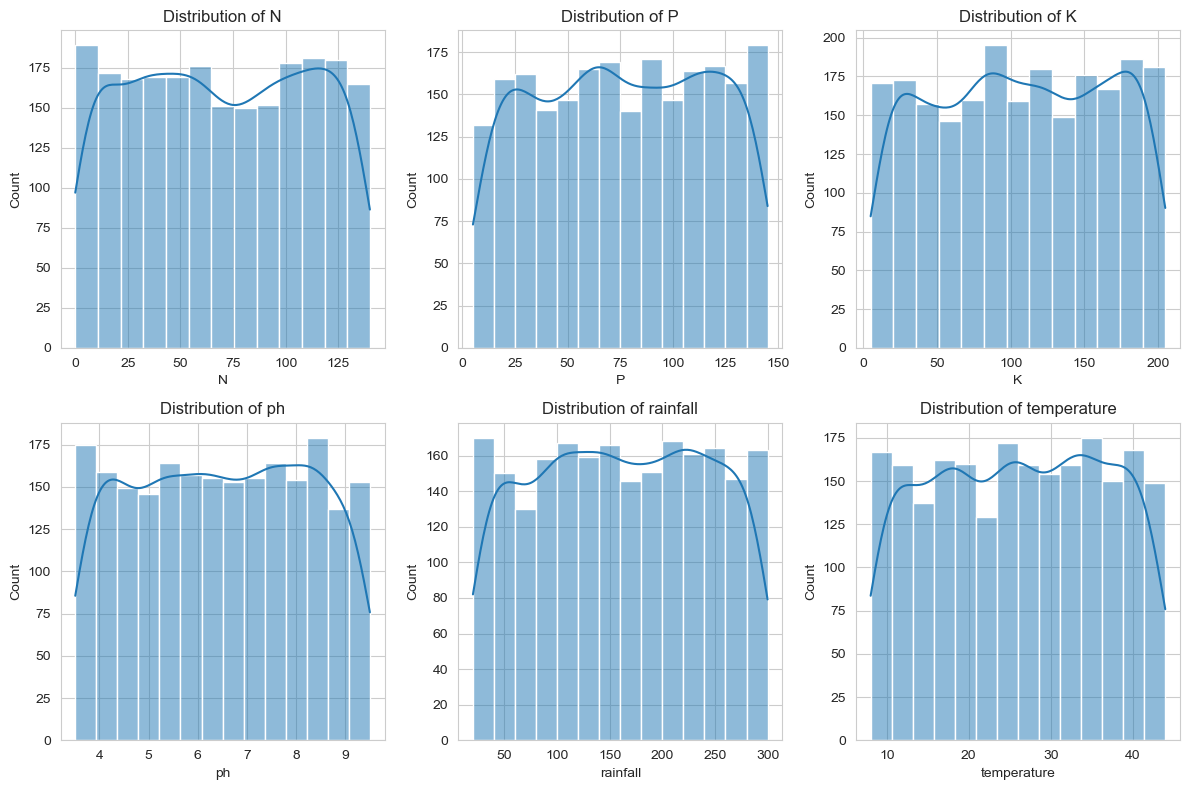

In [26]:
# Visualize feature distributions
plt.figure(figsize=(12, 8))
for i, col in enumerate(['N', 'P', 'K', 'ph', 'rainfall', 'temperature']):
    plt.subplot(2, 3, i+1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


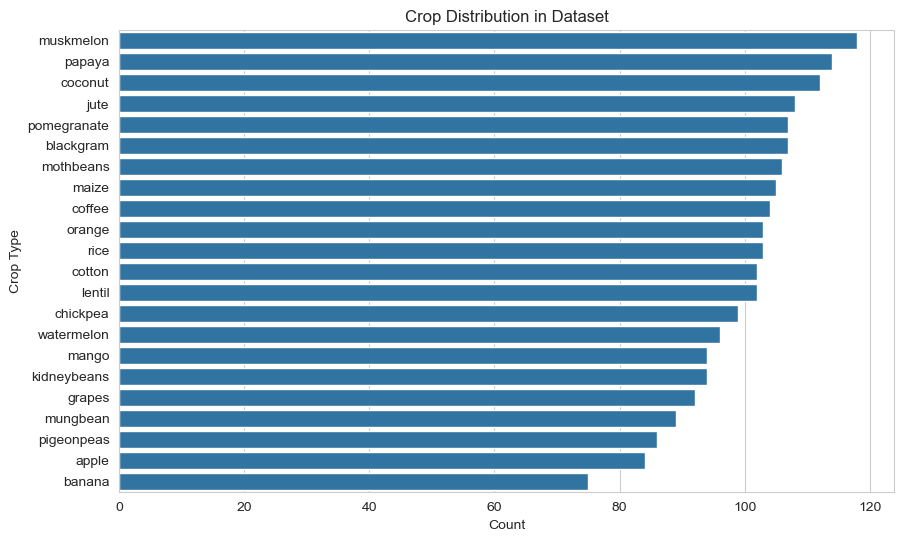

In [27]:
# Visualize crop distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='crop', data=data, order=data['crop'].value_counts().index)
plt.title('Crop Distribution in Dataset')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

In [28]:
# Feature Engineering
features = data[['N', 'P', 'K', 'ph', 'rainfall', 'temperature']]
target = data['crop']


In [29]:
# Encode crop labels
le = LabelEncoder()
target_encoded = le.fit_transform(target)
print(f"Encoded Classes: {le.classes_}")


Encoded Classes: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [30]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    features, target_encoded, test_size=0.2, random_state=42)

In [31]:


print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (1760, 6)
Testing set shape: (440, 6)


In [32]:

# Model Training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
# Model Evaluation
y_pred = model.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

       apple       0.05      0.08      0.06        12
      banana       0.00      0.00      0.00        18
   blackgram       0.00      0.00      0.00        18
    chickpea       0.00      0.00      0.00        16
     coconut       0.11      0.07      0.09        28
      coffee       0.04      0.05      0.04        22
      cotton       0.10      0.08      0.09        25
      grapes       0.04      0.06      0.05        16
        jute       0.16      0.17      0.17        23
 kidneybeans       0.07      0.06      0.06        17
      lentil       0.00      0.00      0.00        21
       maize       0.00      0.00      0.00        23
       mango       0.07      0.09      0.08        22
   mothbeans       0.06      0.06      0.06        18
    mungbean       0.00      0.00      0.00        17
   muskmelon       0.08      0.08      0.08        25
      orange       0.06      0.04      0.05        24
    

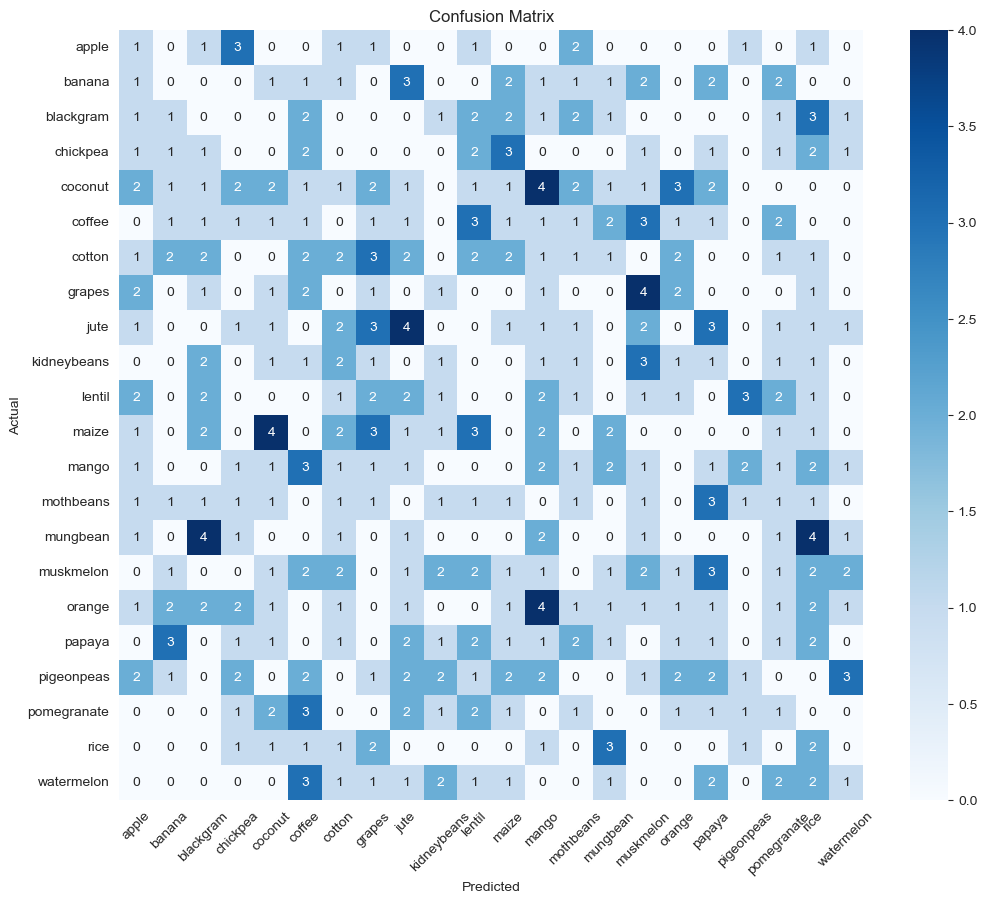

In [34]:

# Confusion Matrix Visualization
plt.figure(figsize=(12, 10))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d',
            xticklabels=le.classes_,
            yticklabels=le.classes_,
            cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.show()


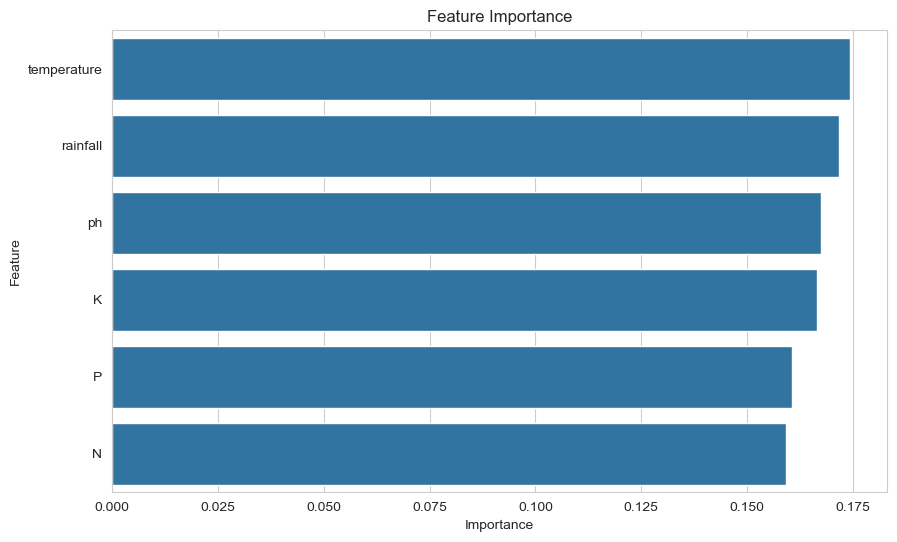

In [35]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': features.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


In [36]:
# Save model artifacts
joblib.dump(model, 'crop_model.pkl')
joblib.dump(le, 'label_encoder.pkl')
np.save('feature_means.npy', features.mean().values)

print(f"\nModel saved with accuracy: {model.score(X_test, y_test):.2f}")



Model saved with accuracy: 0.05


In [37]:
# Example Prediction
sample_input = [[72, 45, 26, 6.5, 120, 25]]  # N, P, K, ph, rainfall, temp
predicted_label = le.inverse_transform(model.predict(sample_input))[0]
print(f"\nRecommended Crop for given conditions: {predicted_label}")


Recommended Crop for given conditions: apple
